# Supernova Signal - 3
Investigate different sampling

```
Created : June 2021
Last Update : 02-09-2021
Melih Kara kara@kit.edu
Ricardo Peres
```

## Table of Contents
- [2D Rates](#rates)
- [Plotting](#plot-data)
    - [Recoil Energy Spectrum 1D](#recoil-spec2D)
    - [Recoil Energy Spectrum 2D](#recoil-spec2D)

# Read model and 2D recoil rates<a class="anchor" id="rates"></a>

In [1]:
# allows to import from the parent directory
import sys; sys.path.append('../')

from snx import *
from snx.SN_plotter import Plotter
from snx.Supernova_Models import SN_lightcurve

In [2]:
M30sn_model  = SN_lightcurve(progenitor_mass = 30,
                             metallicity= 0.02,
                             time_of_revival = 100, 
                             distance = 10)

Retrieving object ../data/Object_M30-Z0.02_dist10.p
Object was found! 
To save manually: save_object(filename, update=True)



In [3]:
M30sn_model.get_recoil_spectra1D()
M30sn_model.get_recoil_spectra2D()

Retrieving object ../data/Object_M30-Z0.02_dist10_Er0.0-20.0_t0-0-tf-10_1D.p
Retrieving object ../data/../data/Object_M30-Z0.02_dist10_Er0.0-15.5_step1_dist10_2D.p


### Sample and plot the data<a class="anchor" id="plot-data"></a>

In [4]:
plotter = Plotter(M30sn_model)

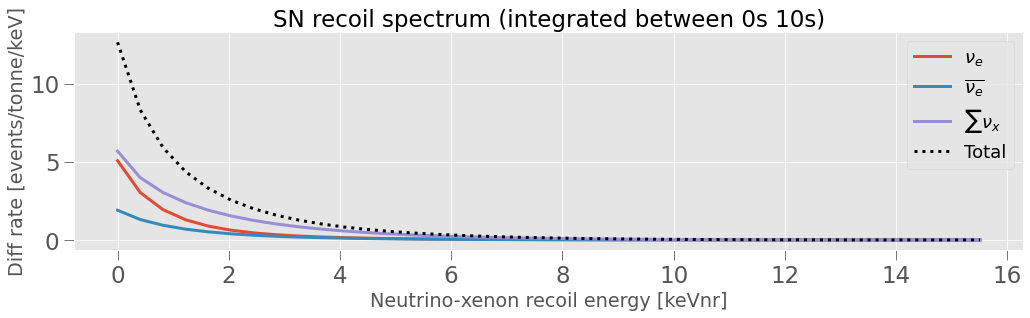

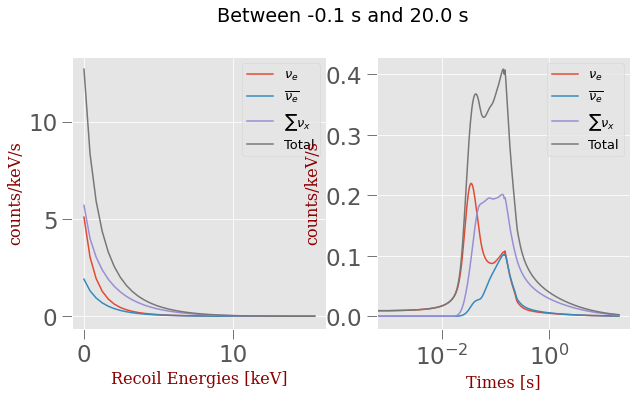

In [5]:
plotter.plot_recoil_spectra();
plotter.plot_recoil_spectra2D(integrated=True, figsize=(10,5));

#### Sample from 1D spectrum

Worked!


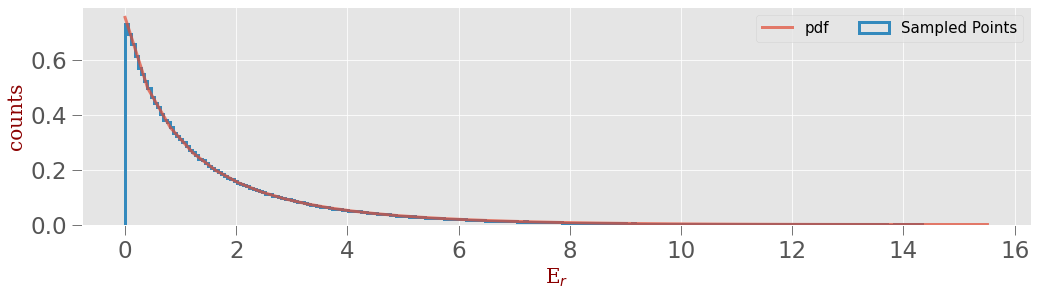

In [6]:
fig, ax, samples = plotter.plot_sampled_energies()

#### Sample from 2D spectra

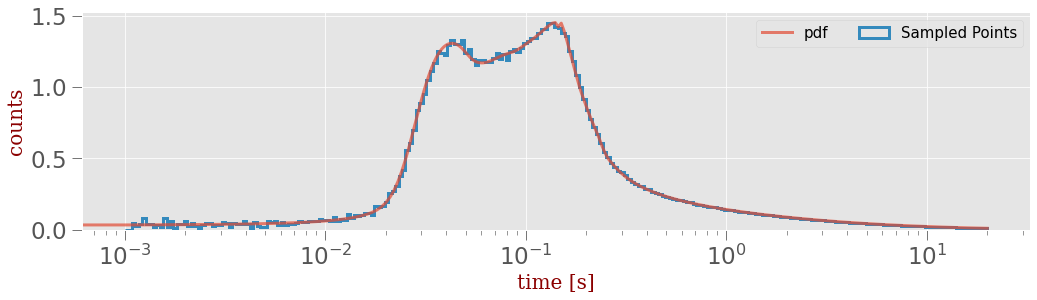

In [7]:
plotter.plot_sampled_energies(x='time', xscale='log');

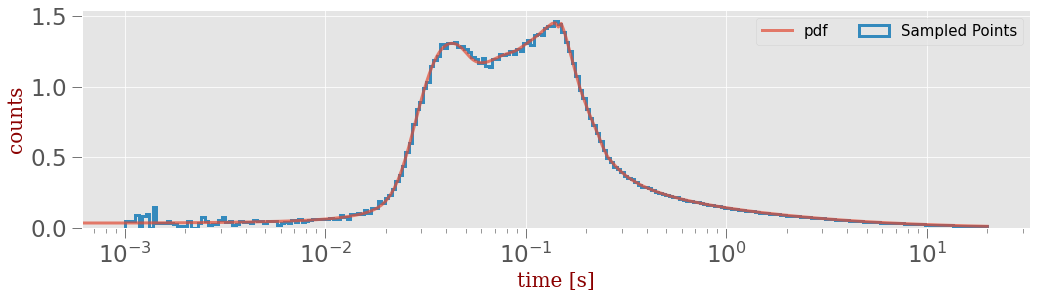

In [8]:
fig, ax, _ = plotter.plot_sampled_energies(x='time', xscale='log');

#### Object attributes

In [9]:
tot_rates1D = M30sn_model.total_rate1D # integrated(summed) between 0-10s 
tot_rates2D = M30sn_model.total_rate2D
recoil_energy_bins = M30sn_model.recoil_en
timebins = M30sn_model.t
nu_energies = M30sn_model.mean_E
rates_Er, rates_t = M30sn_model._get_1Drates_from2D()
Er_sample_E = M30sn_model.sample_from_recoil_spectrum(N_sample=100000)
Er_sample_t = M30sn_model.sample_from_recoil_spectrum(x='time',N_sample=100000)

Worked!


### Signal at the Detector

In [10]:
from snx.Simulate_Signal import Simulator
simulator = Simulator('test')

Worked!


No handles with labels found to put in legend.


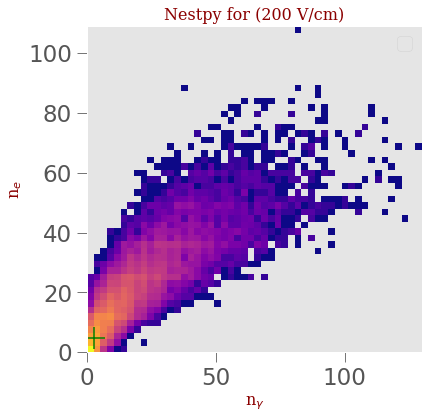

In [13]:
sampled_energies = M30sn_model.sample_from_recoil_spectrum(N_sample=50000)
simulator.simulate_quanta(sampled_energies, plot=True);

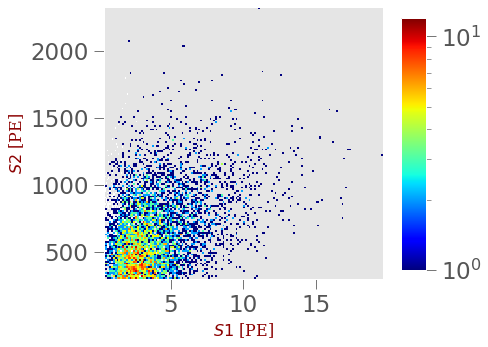

In [12]:
simulator.Plot_S1S2(sampled_energies);

See **Luminosity plots** and **Number Flux Plots** in the [previous notebook](Supernova_Signal-1.ipynb)